In [1]:
import seaborn as sns

In [2]:
%matplotlib inline
tips=sns.load_dataset('tips')
flights=sns.load_dataset('flights')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


### Matrix plots
##### matrix plot is nothing but the heatmap and for creating the heat map, we need to make our data set in matrix form

In [5]:
tc=tips.corr()

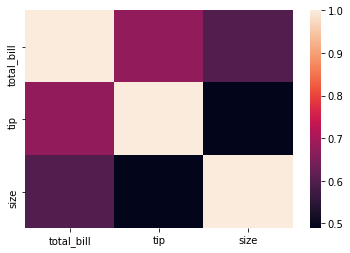

In [6]:
sns.heatmap(tc)

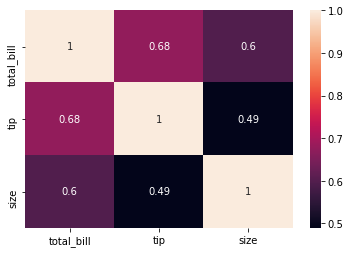

In [7]:
sns.heatmap(tc,annot=True)

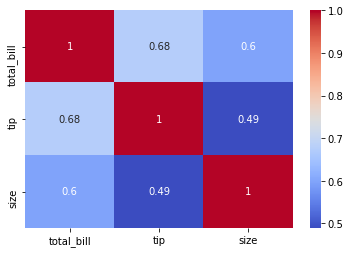

In [8]:
sns.heatmap(tc,annot=True,cmap='coolwarm')

In [9]:
fp=flights.pivot_table(index='month',columns='year',values='passengers')#making our flight data into matrix

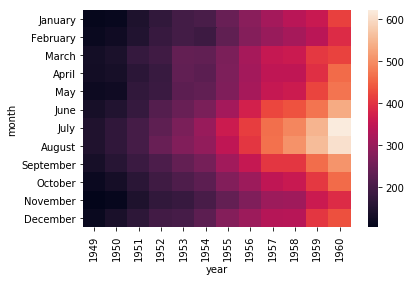

In [10]:
sns.heatmap(fp)

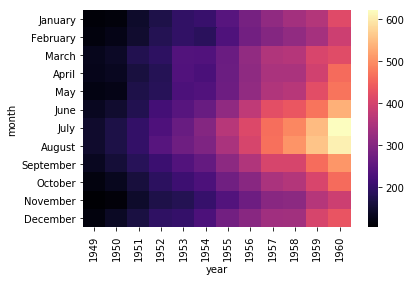

In [11]:
sns.heatmap(fp,cmap='magma')

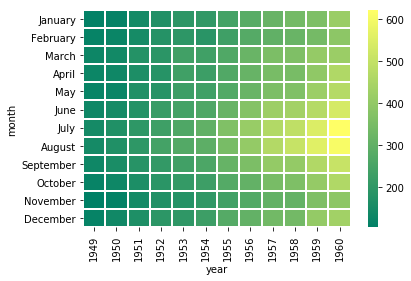

In [12]:
sns.heatmap(fp,cmap='summer',linecolor='white',linewidths=1)

### Cluster map

this clustor map is use to create clustors rows and columns together based off there similarity

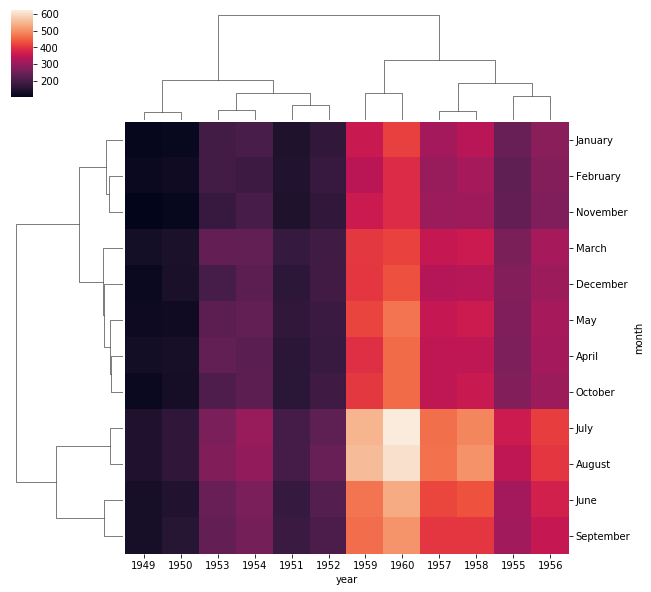

In [13]:
sns.clustermap(fp)

# Grids


In [14]:
import seaborn as sns
%matplotlib inline
iris=sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [15]:
iris['species'].unique() #unique element in list.

array(['setosa', 'versicolor', 'virginica'], dtype=object)

### Pair Plots
pair plots are the automated joint plot for the entire dataset 

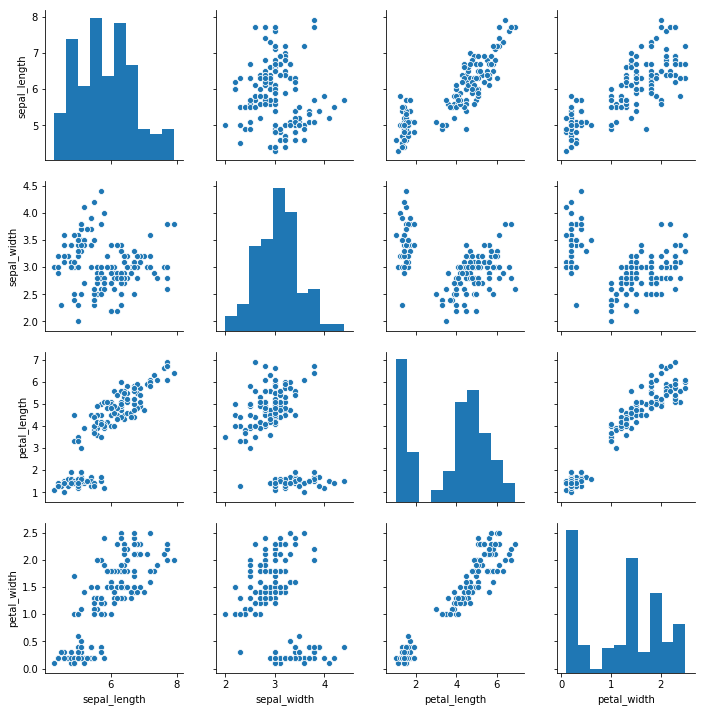

In [16]:
sns.pairplot(iris)

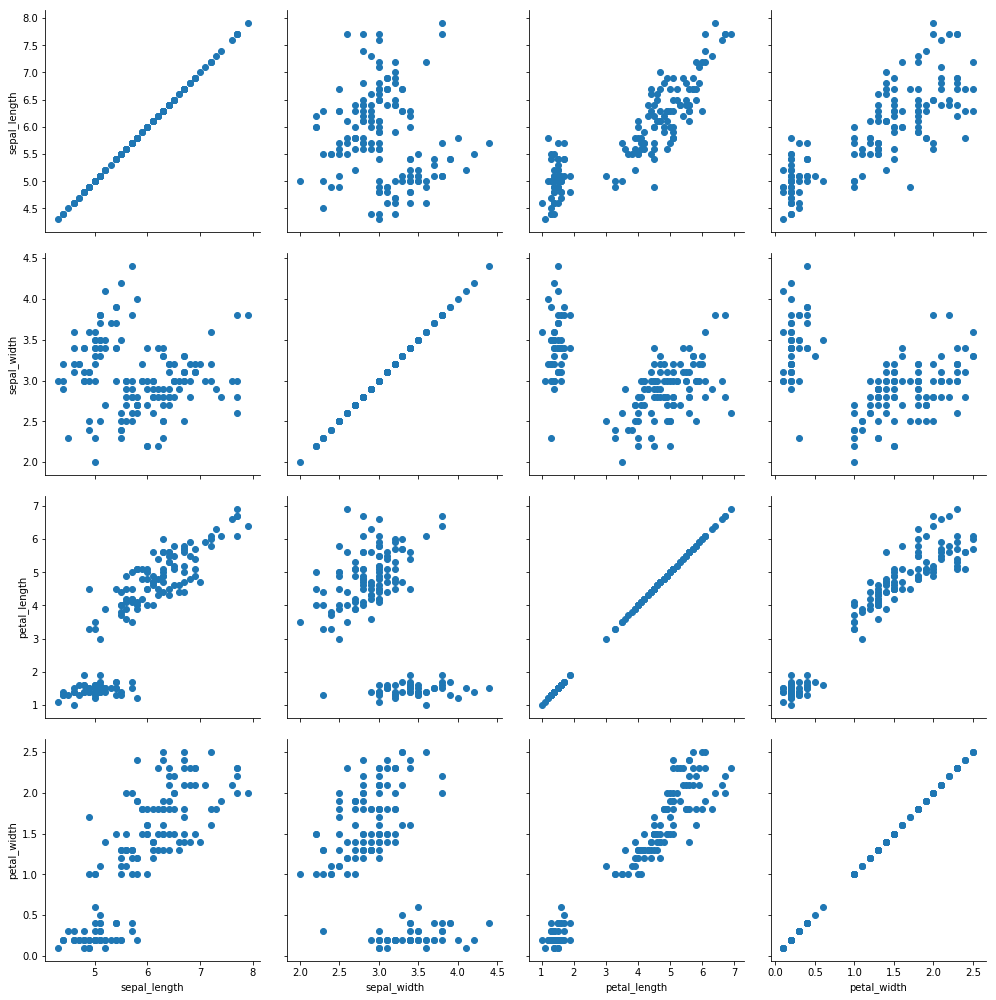

In [17]:
import matplotlib.pyplot as plt
g=sns.PairGrid(iris,height=3.5)
g.map(plt.scatter)

#### as by defalut the diagnol of the pairplot is automatic but with help of pairplot we can objects as per our requirement.

#### for example above pair plot will change the upper half and lower half with the scatter plot

C:\Users\user\Anaconda2\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


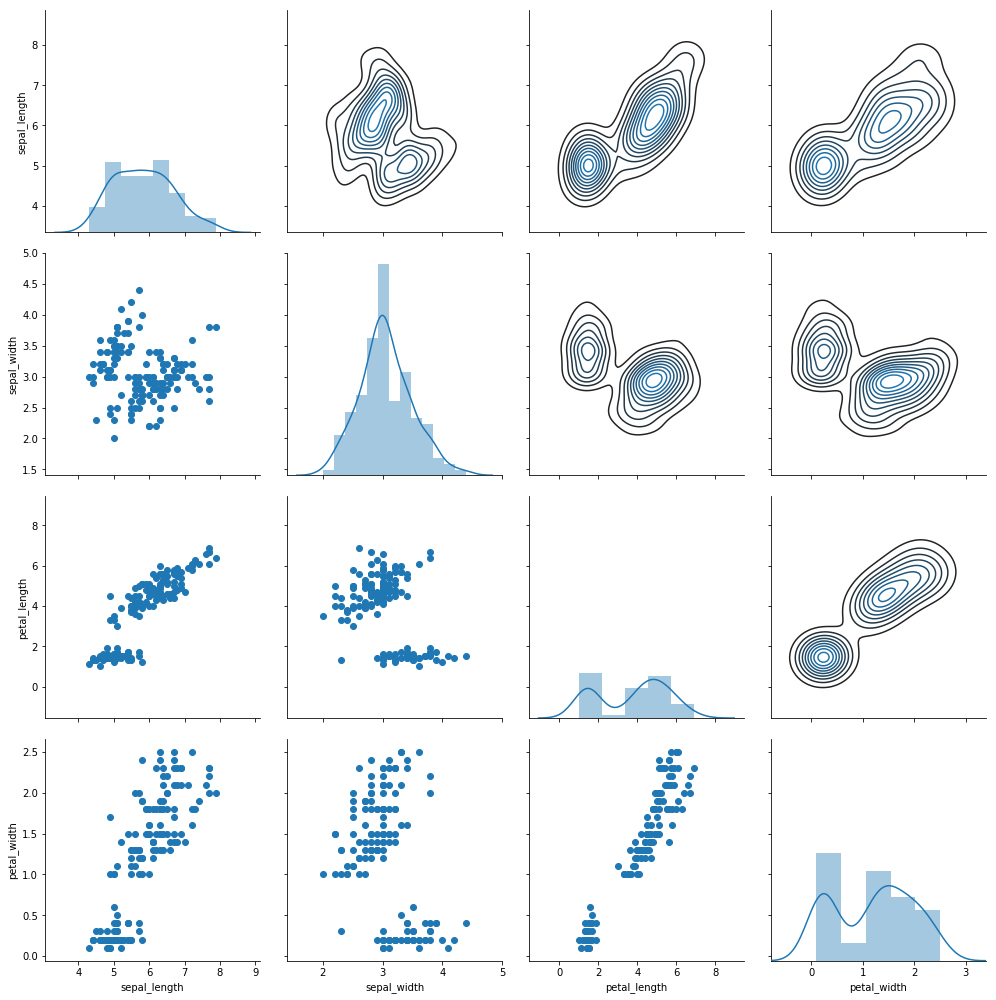

In [18]:
#now ploting each grids with our own
g=sns.PairGrid(iris,height=3.5)
g.map_diag(sns.distplot) #diagnol
g.map_upper(sns.kdeplot) #upper half
g.map_lower(plt.scatter)

# facet Grid

This class maps a dataset onto multiple axes arrayed in a grid of rows
and columns that correspond to *levels* of variables in the dataset.
The plots it produces are often called "lattice", "trellis", or
"small-multiple" graphics.

It can also represent levels of a third varaible with the ``hue``
parameter, which plots different subets of data in different colors.
This uses color to resolve elements on a third dimension, but only
draws subsets on top of each other and will not tailor the ``hue``
parameter for the specific visualization the way that axes-level
functions that accept ``hue`` will.

When using seaborn functions that infer semantic mappings from a
dataset, care must be taken to synchronize those mappings across
facets. In most cases, it will be better to use a figure-level function
(e.g. :func:`relplot` or :func:`catplot`) than to use
:class:`FacetGrid` directly.

The basic workflow is to initialize the :class:`FacetGrid` object with
the dataset and the variables that are used to structure the grid. Then
one or more plotting functions can be applied to each subset by calling
:meth:`FacetGrid.map` or :meth:`FacetGrid.map_dataframe`. Finally, the
plot can be tweaked with other methods to do things like change the
axis labels, use different ticks, or add a legend. See the detailed
code examples below for more information.

In [19]:
#load dataset
tips=sns.load_dataset('tips')

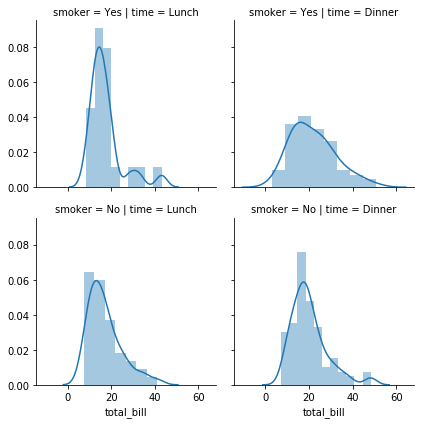

In [20]:
g=sns.FacetGrid(data=tips,col='time',row='smoker')
g.map(sns.distplot,'total_bill')

#### We can play with three variable in this FacetGrid by using the row, col are What variable we want to separate by for FacetGrid  and we can map with a another variable also.

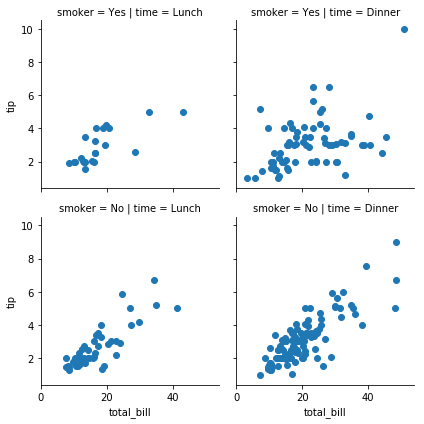

In [21]:
f=sns.FacetGrid(data=tips,col='time',row='smoker')
f.map(plt.scatter,'total_bill','tip')

# Regression

##### we will only cover the l and M function. these plots allows you to display linear models with seaborn. 

## L.M plot

### Linear Model plots and then what feature you want on the x-axis versus the y-axis in the plot


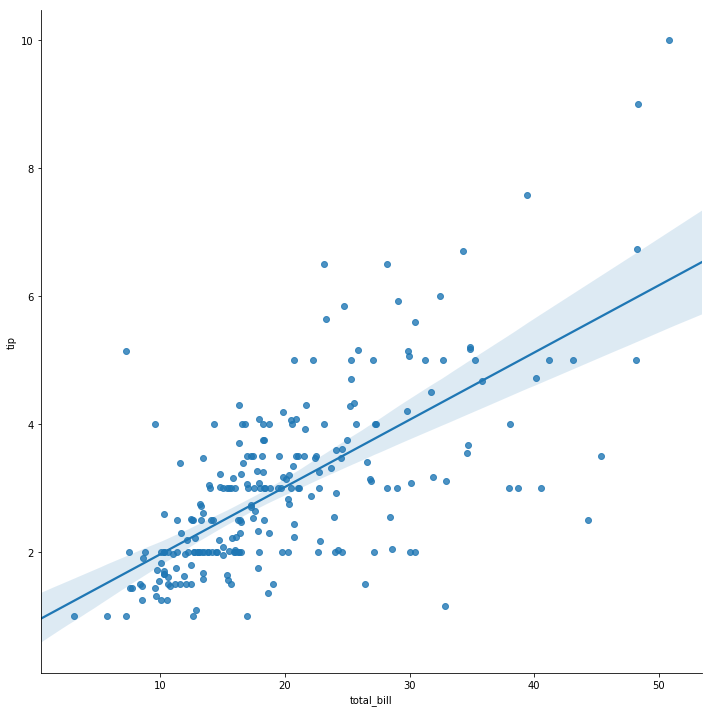

In [22]:
sns.lmplot(x='total_bill',y='tip',data=tips,height=10)

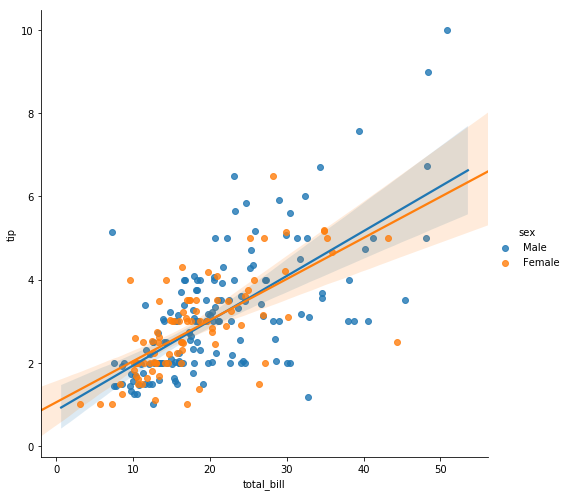

In [23]:
#using the hue arguement
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',height=7)

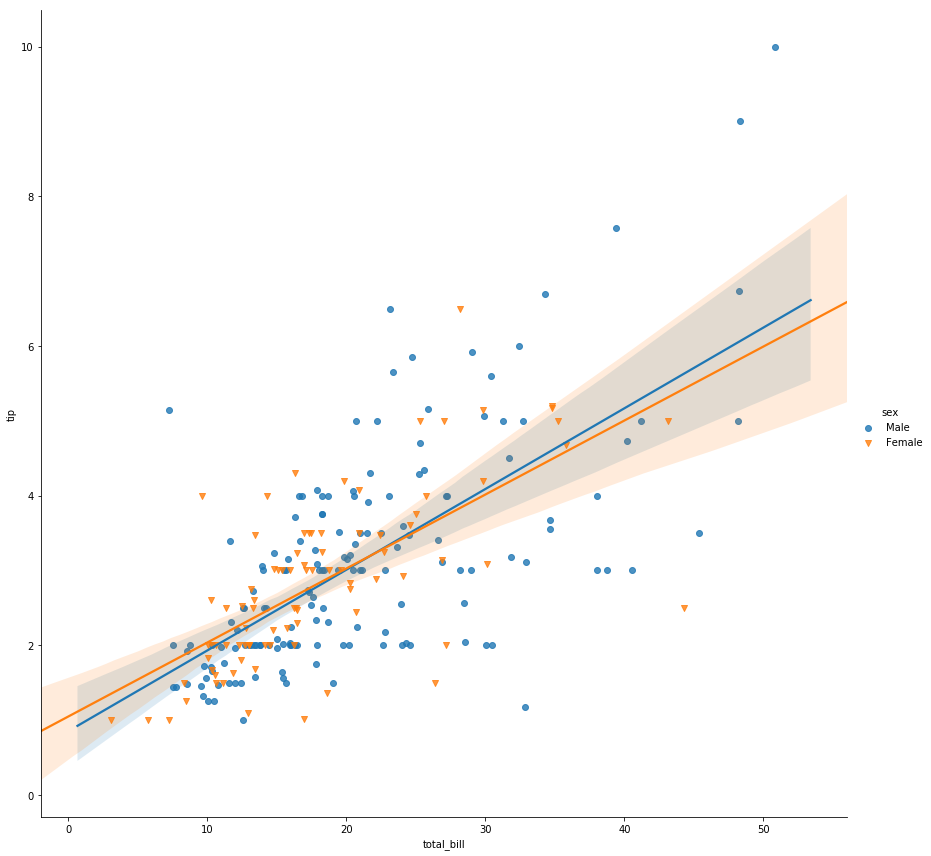

In [24]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex', markers=['o','v'],height=12)

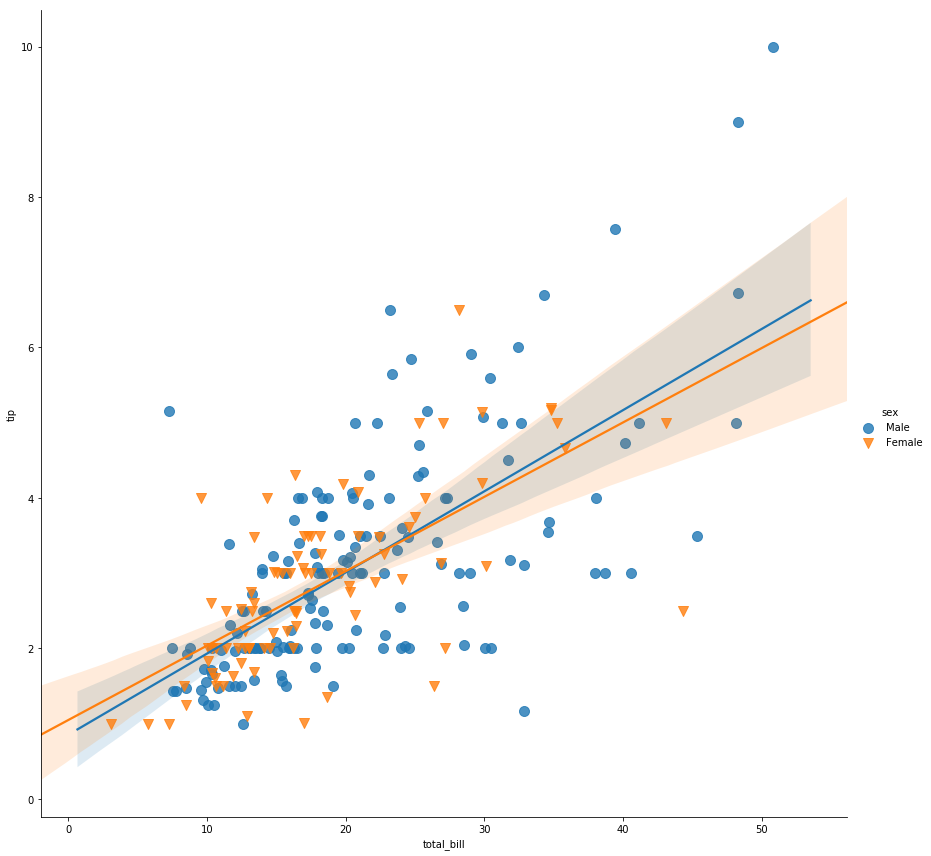

In [25]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex', markers=['o','v'],height=12,scatter_kws={'s':100})

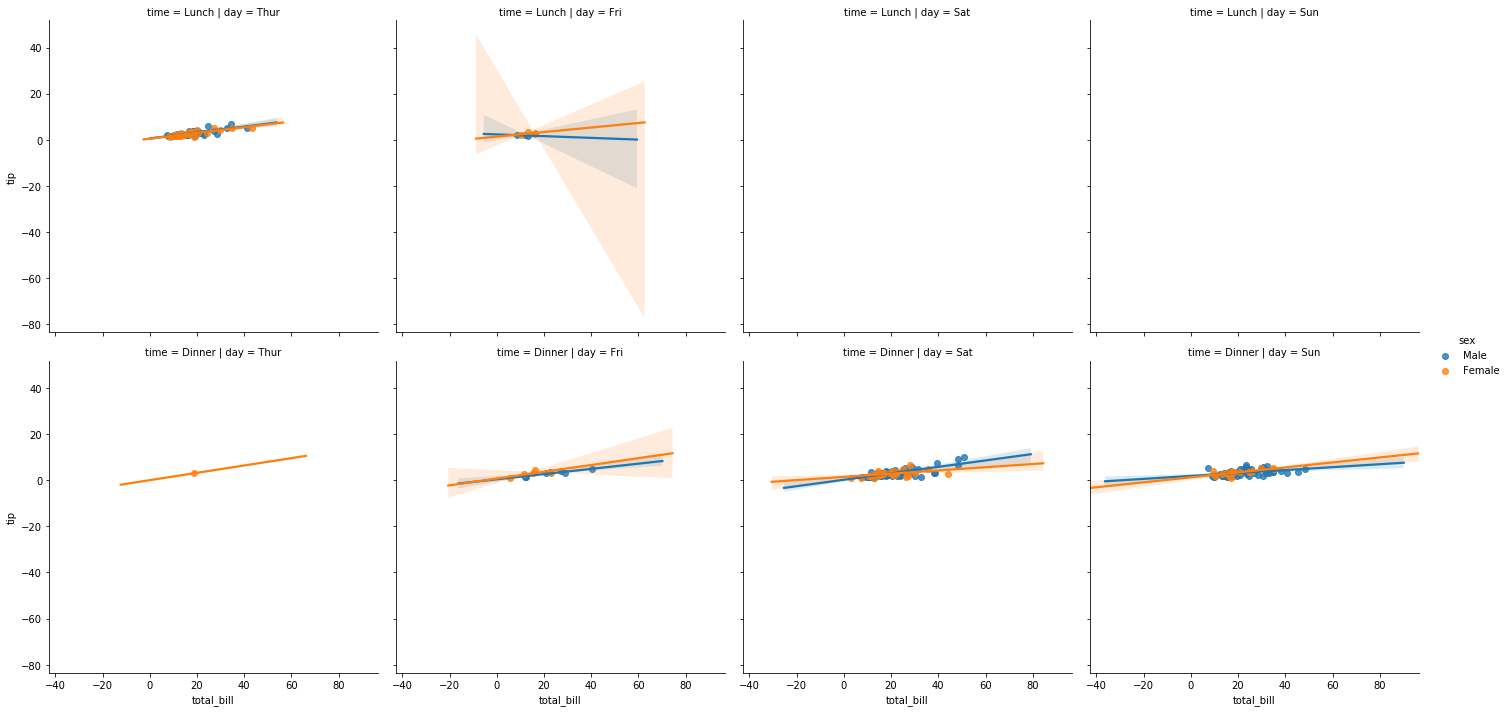

In [26]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',row='time',hue='sex')

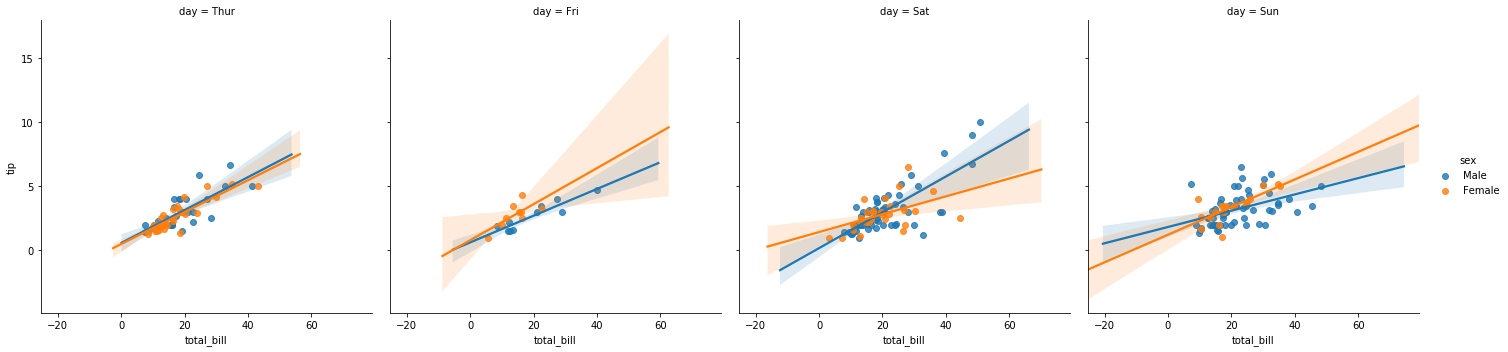

In [27]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex')# we do not specifying row

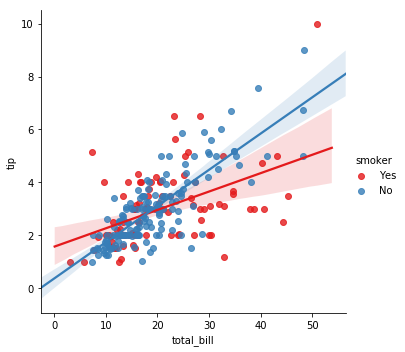

In [28]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips,palette="Set1")

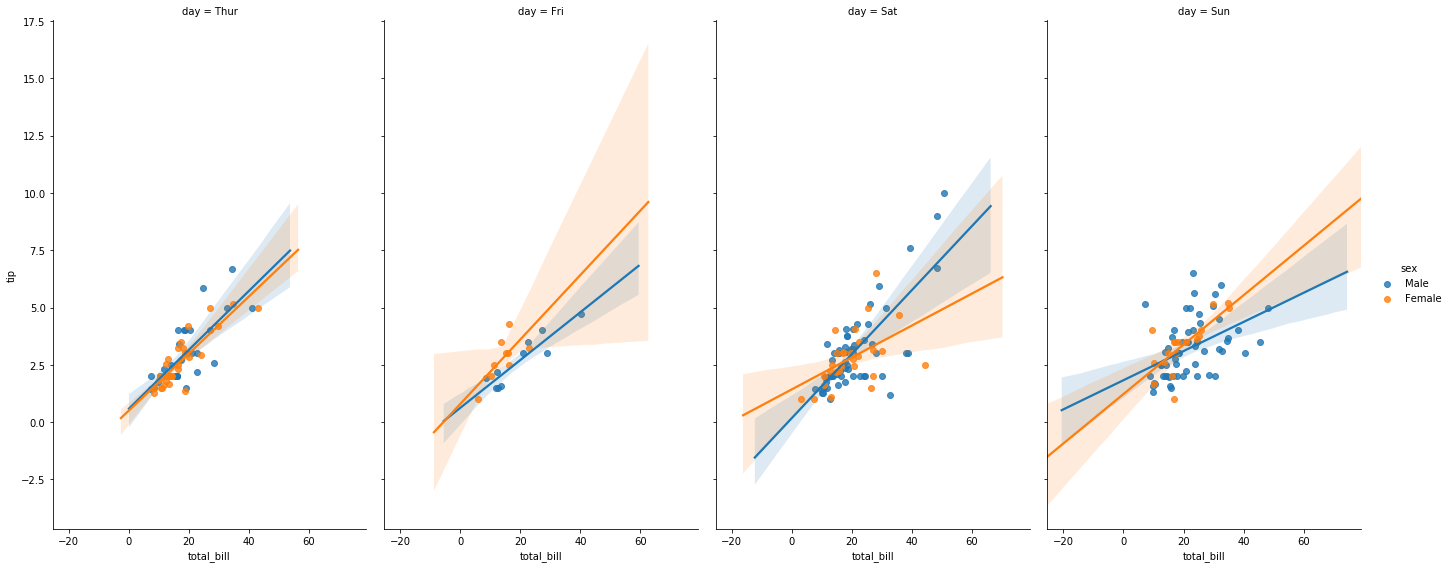

In [29]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',aspect=0.6,height=8)

In [32]:
g = (g.set_axis_labels("Total bill (US Dollars)", "Tip").set(xlim=(0, 60), ylim=(0, 12),xticks=[10, 30, 50], yticks=[2, 6, 10]).fig.subplots_adjust(wspace=.02))

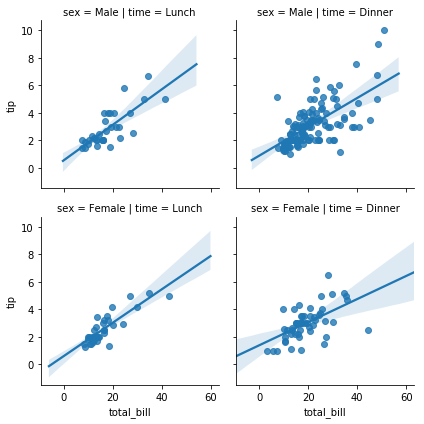

In [31]:
g = sns.lmplot(x="total_bill", y="tip", row="sex", col="time",data=tips, height=3)

## Style and Colour

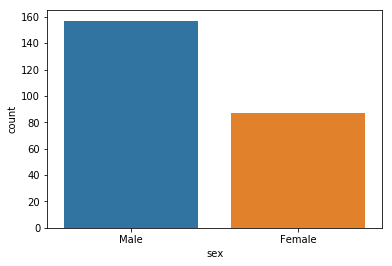

In [33]:
#countplot
sns.countplot(x='sex',data=tips)

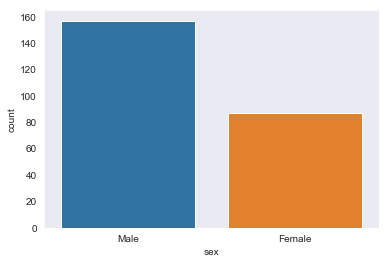

In [36]:
#seaborn has some style elements that make our plot looks good
sns.set_style('dark')   # create dark background.
sns.countplot(x='sex',data=tips)

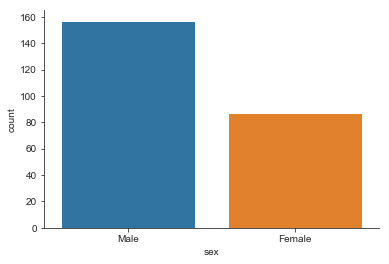

In [39]:
#remove spines
sns.set_style('ticks')
sns.countplot(x='sex',data=tips)
sns.despine()

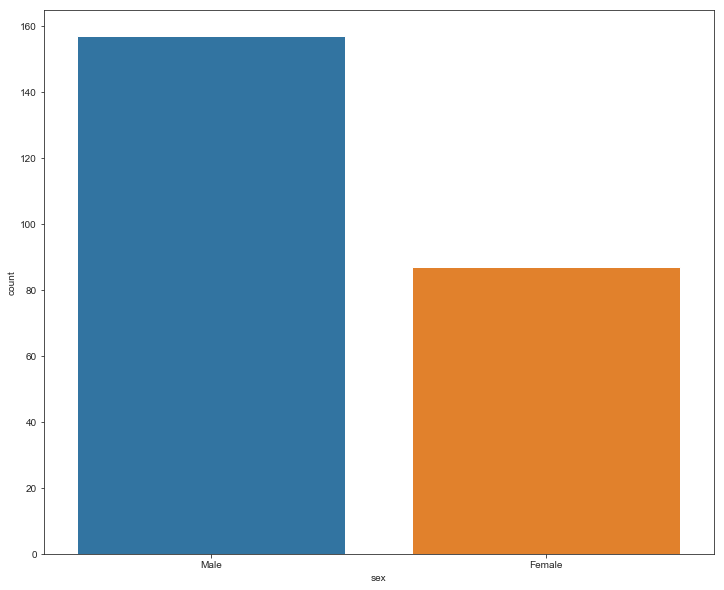

In [41]:
#we can change the size and style as well as aspect ratio.
plt.figure(figsize=(12,10)) # our matplotlib code.
sns.countplot(x='sex',data=tips)

###### poster makes a font small and large.

###### font_scale makes a font small and large.

###### notebook sets the content of figure.

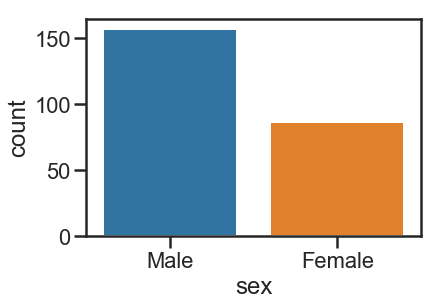

In [43]:
sns.set_context('poster')
sns.countplot(x='sex',data=tips)

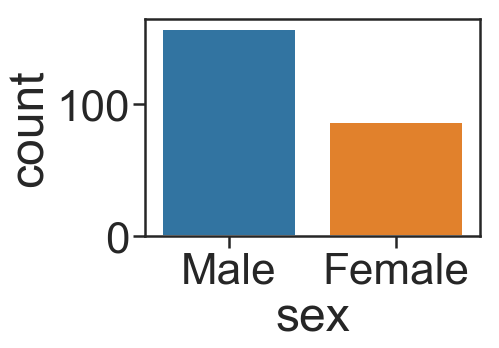

In [44]:
sns.set_context('poster',font_scale=2)
sns.countplot(x='sex',data=tips)

C:\Users\user\Anaconda2\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


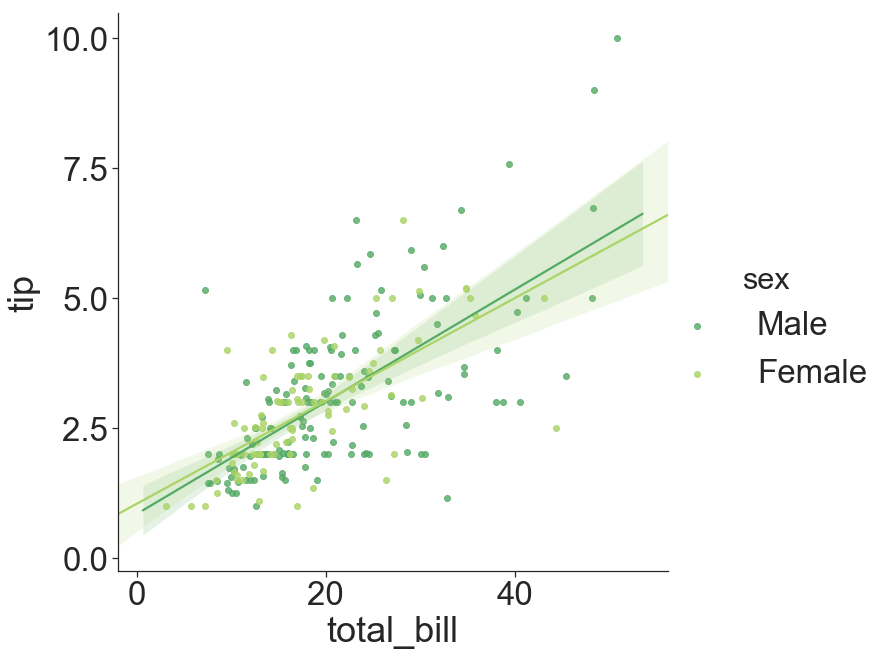

In [54]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='summer',size=10)
sns.set_context('notebook',font_scale=5)

# GREAT JOB